# WINCONSIN BREAST CANCER DETECTION

### About the data set :

Creator: \
Dr. WIlliam H. Wolberg (physician) \
University of Wisconsin Hospitals \
Madison, Wisconsin, USA 

Location: \
UCI data repository \
Kaggle data repository 



### Attribute Information:


* Sample code number: id number
* Clump Thickness: 1 – 10
* Uniformity of Cell Size: 1 – 10
* Uniformity of Cell Shape: 1 – 10
* Marginal Adhesion: 1 – 10
* Single Epithelial Cell Size: 1 – 10
* Bare Nuclei: 1 – 10
* Bland Chromatin: 1 – 10
* Normal Nucleoli: 1 – 10
* Mitoses: 1 – 10
* Class: (2 for benign, 4 for malignant)

#### Malignant==> Cancerous
#### Benign==> Not Cancerous (Healthy)

#### Background

All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually, those cells behave\ in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and\ pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located\ and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the\ bloodstream and becoming is called metastasis.

In summary, as we grow older, throughout a lifetime, we go through this kind of situation where a particular kind of gene is\ mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

#### Can we predict whether a cell is Malignant or Benign?

## SCRIPT

#### Importing essentials packages

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### reading dataset CSV file

In [2]:
df = pd.read_csv('dataset/breastCancer.csv',header = 0)
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


#### data cleaning and formating

In [4]:
#### checking bare bucleoli
df.bare_nucleoli

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [5]:
#### changing bare_nucleoli to integer format
"there are some unknown format in bare_nucleoli = ?."
df[df['bare_nucleoli'] == '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [6]:
df[df['bare_nucleoli'] == '?'].count()

id                   16
clump_thickness      16
size_uniformity      16
shape_uniformity     16
marginal_adhesion    16
epithelial_size      16
bare_nucleoli        16
bland_chromatin      16
normal_nucleoli      16
mitoses              16
class                16
dtype: int64

There are only 16 datapoints where the bare_nucleoli is ?.Hence I believe dropping/filtering/or replacing with median/
in those rows is a good option.

In [7]:
df1 = df[df['bare_nucleoli'] != '?']

#### checking the count of bare_nucleoli == ?
df1[df1['bare_nucleoli'] == '?'].count()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [8]:
df1.bare_nucleoli.dtype

dtype('O')

In [9]:
#### typecast of bare_nucleoli
df1.bare_nucleoli = df1.bare_nucleoli.astype('int64')
df1.bare_nucleoli

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
24      1
25      7
26      1
27      1
28      1
29      1
30      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 683, dtype: int64

In [10]:
#### calculating median
df1.bare_nucleoli.median()

1.0

In [11]:
#### replacing the ? into median in original dataframe 
df.bare_nucleoli = df.bare_nucleoli.replace('?',df1.bare_nucleoli.median())
df.bare_nucleoli

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [12]:
#### typecast original bare_nucleoli into int
df.bare_nucleoli = df.bare_nucleoli.astype('int64')

#### verifying dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null int64
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


#### Explanatory Data Analysis (EDA)

In [13]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Here 'id' is the unique key representing unique rows .But id is not helping during correlationship. We will drop it .

In [14]:
#### creating a copy of dataframe 
df_eda = df.copy()

#### dropping id from dataframe
df_eda.drop(['id'],axis = 1,inplace = True)
df_eda.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [15]:
#### describe 
df_eda.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


Here we notice that the standard deviation of all variable are not very diverse . They are uniform.

##### Univariant Analysis 

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


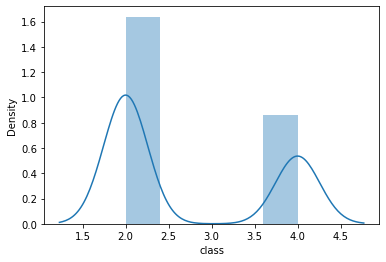

In [17]:
sns.distplot(df_eda['class'])

Both classes are normally distributed

##### Multivariant Analysis

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-pack

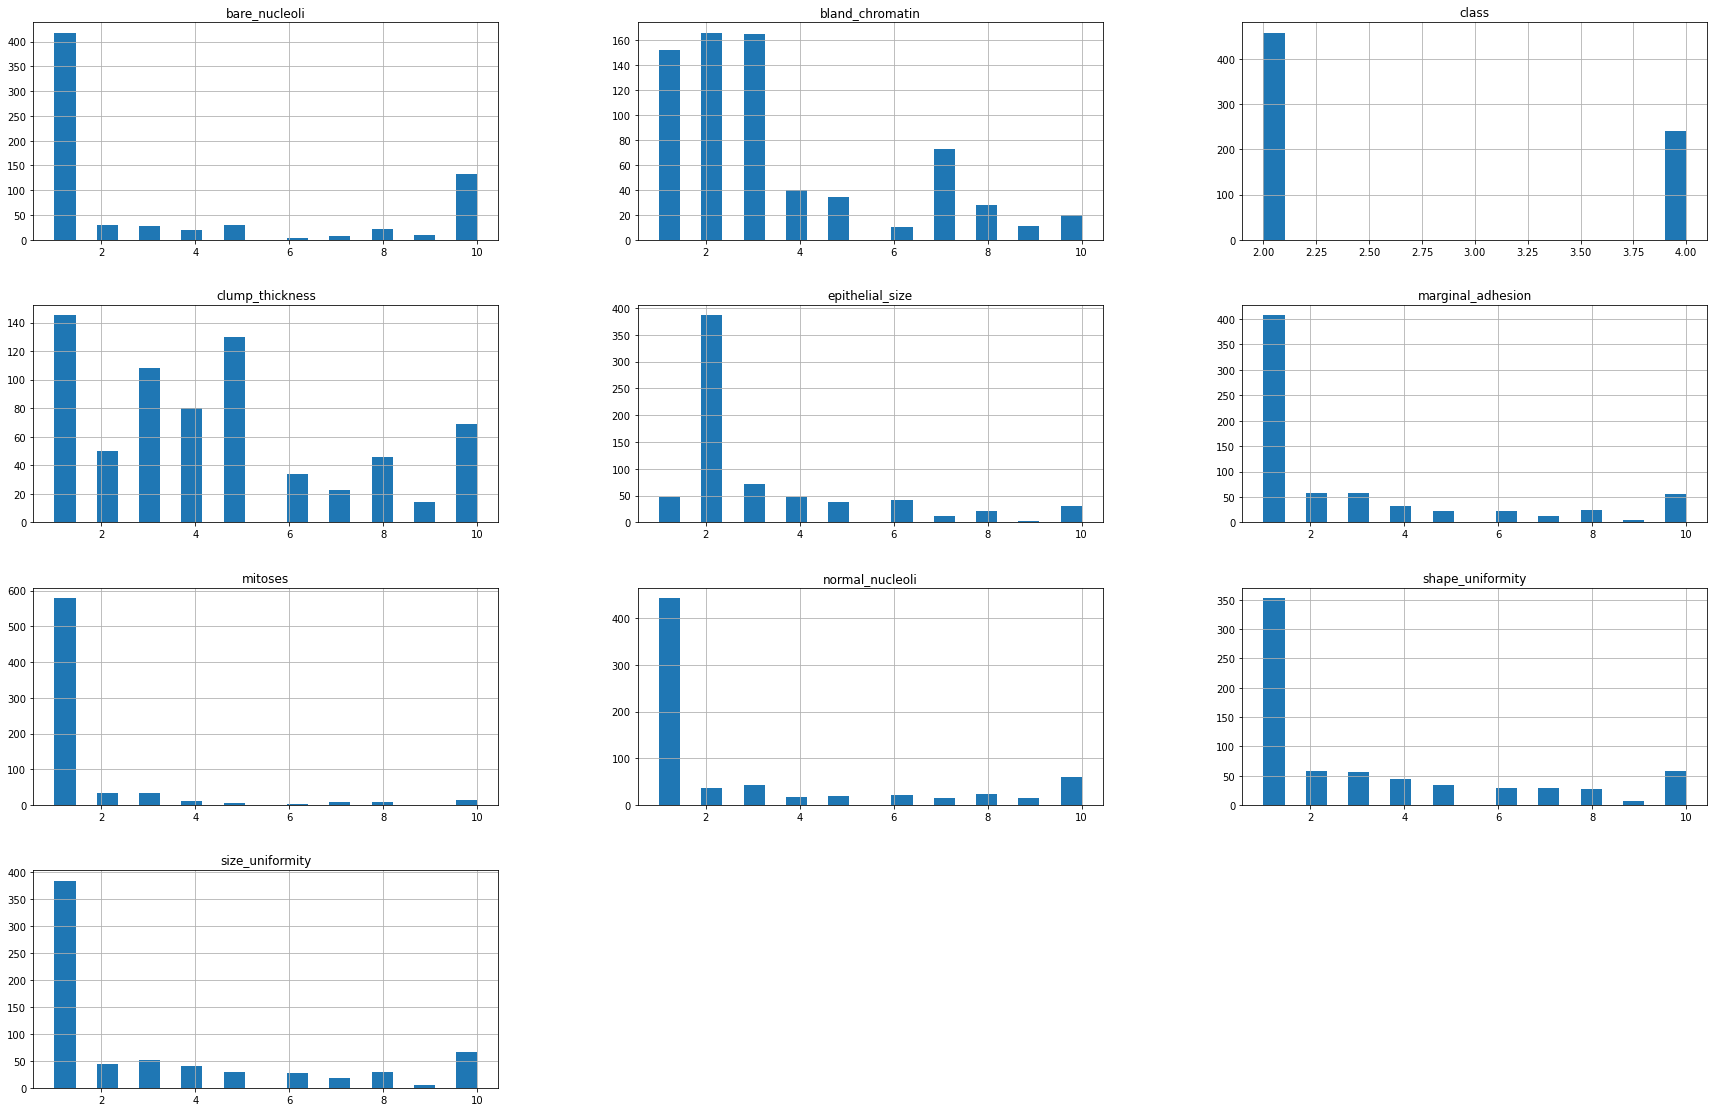

In [18]:
#### multiple variable histogram from dataframe
df_eda.hist(bins = 20,layout = (6,3),figsize = (30,30));

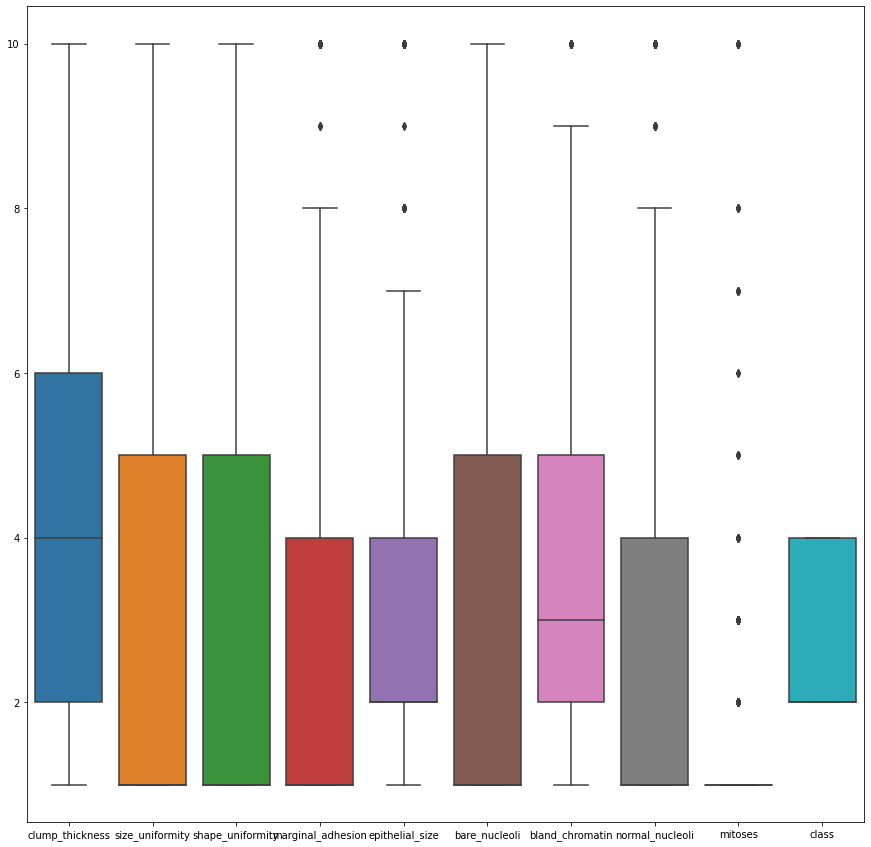

In [19]:
#### boxplot
plt.figure(figsize = (15,15))
sns.boxplot(data = df_eda)

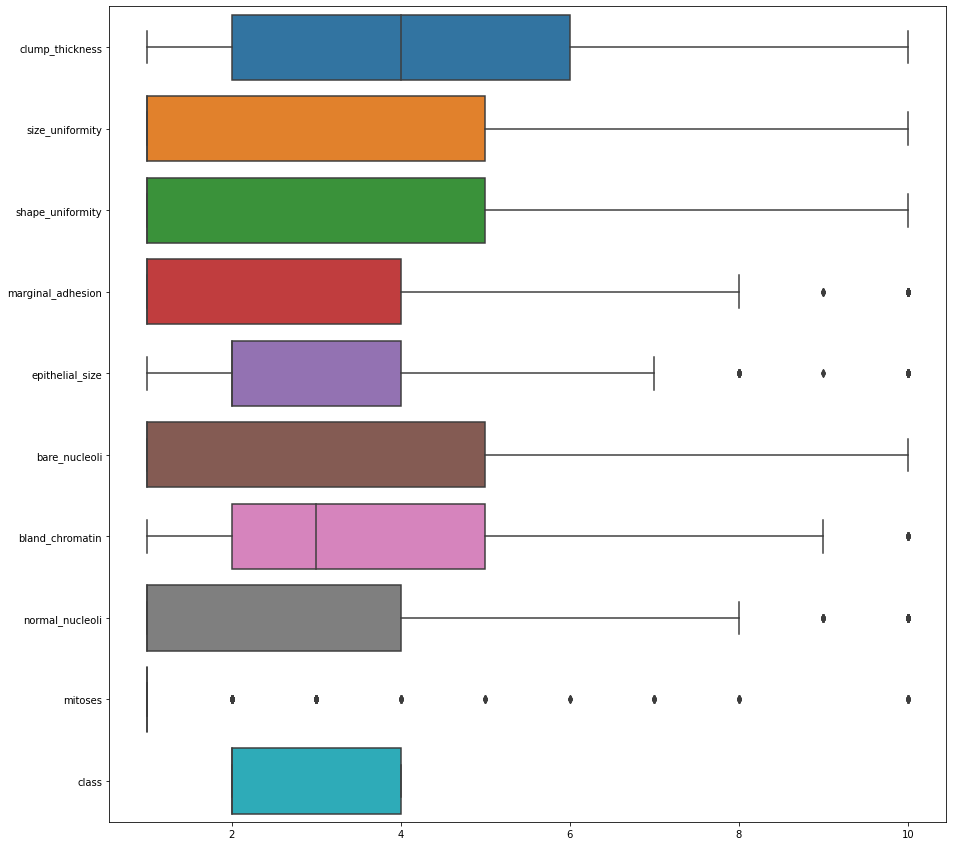

In [20]:
plt.figure(figsize = (15,15))
sns.boxplot(data = df_eda,orient = 'h')

In [21]:
#### data correlation
df_eda.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


Here all the relationship is POSITIVE and highly related .Mostly if multiple variables are highly related then we use PCA to avoid multicollinearity. 

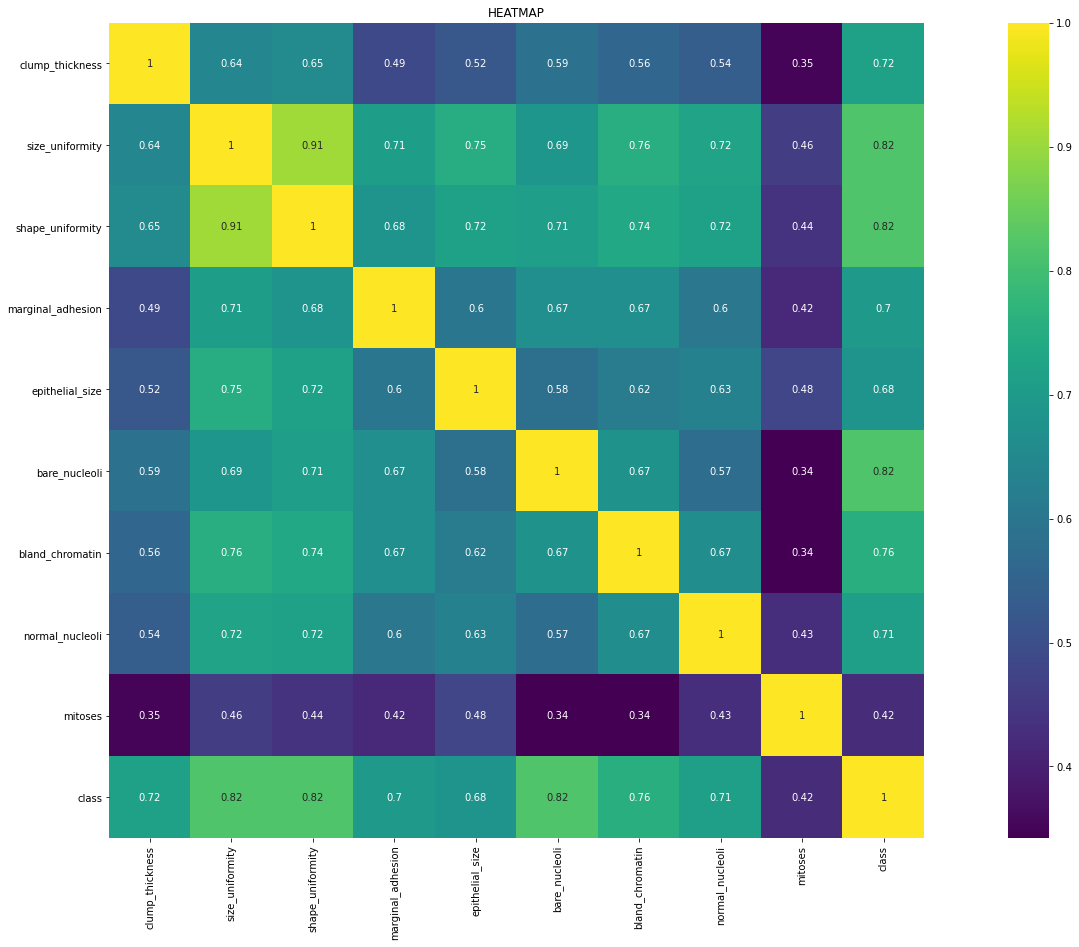

In [22]:
#### heatmap
plt.figure(figsize = (30,15))
sns.heatmap(df_eda.corr(),vmax = 1,square = True,annot = True,cmap = 'viridis')
plt.title("HEATMAP")
plt.show()

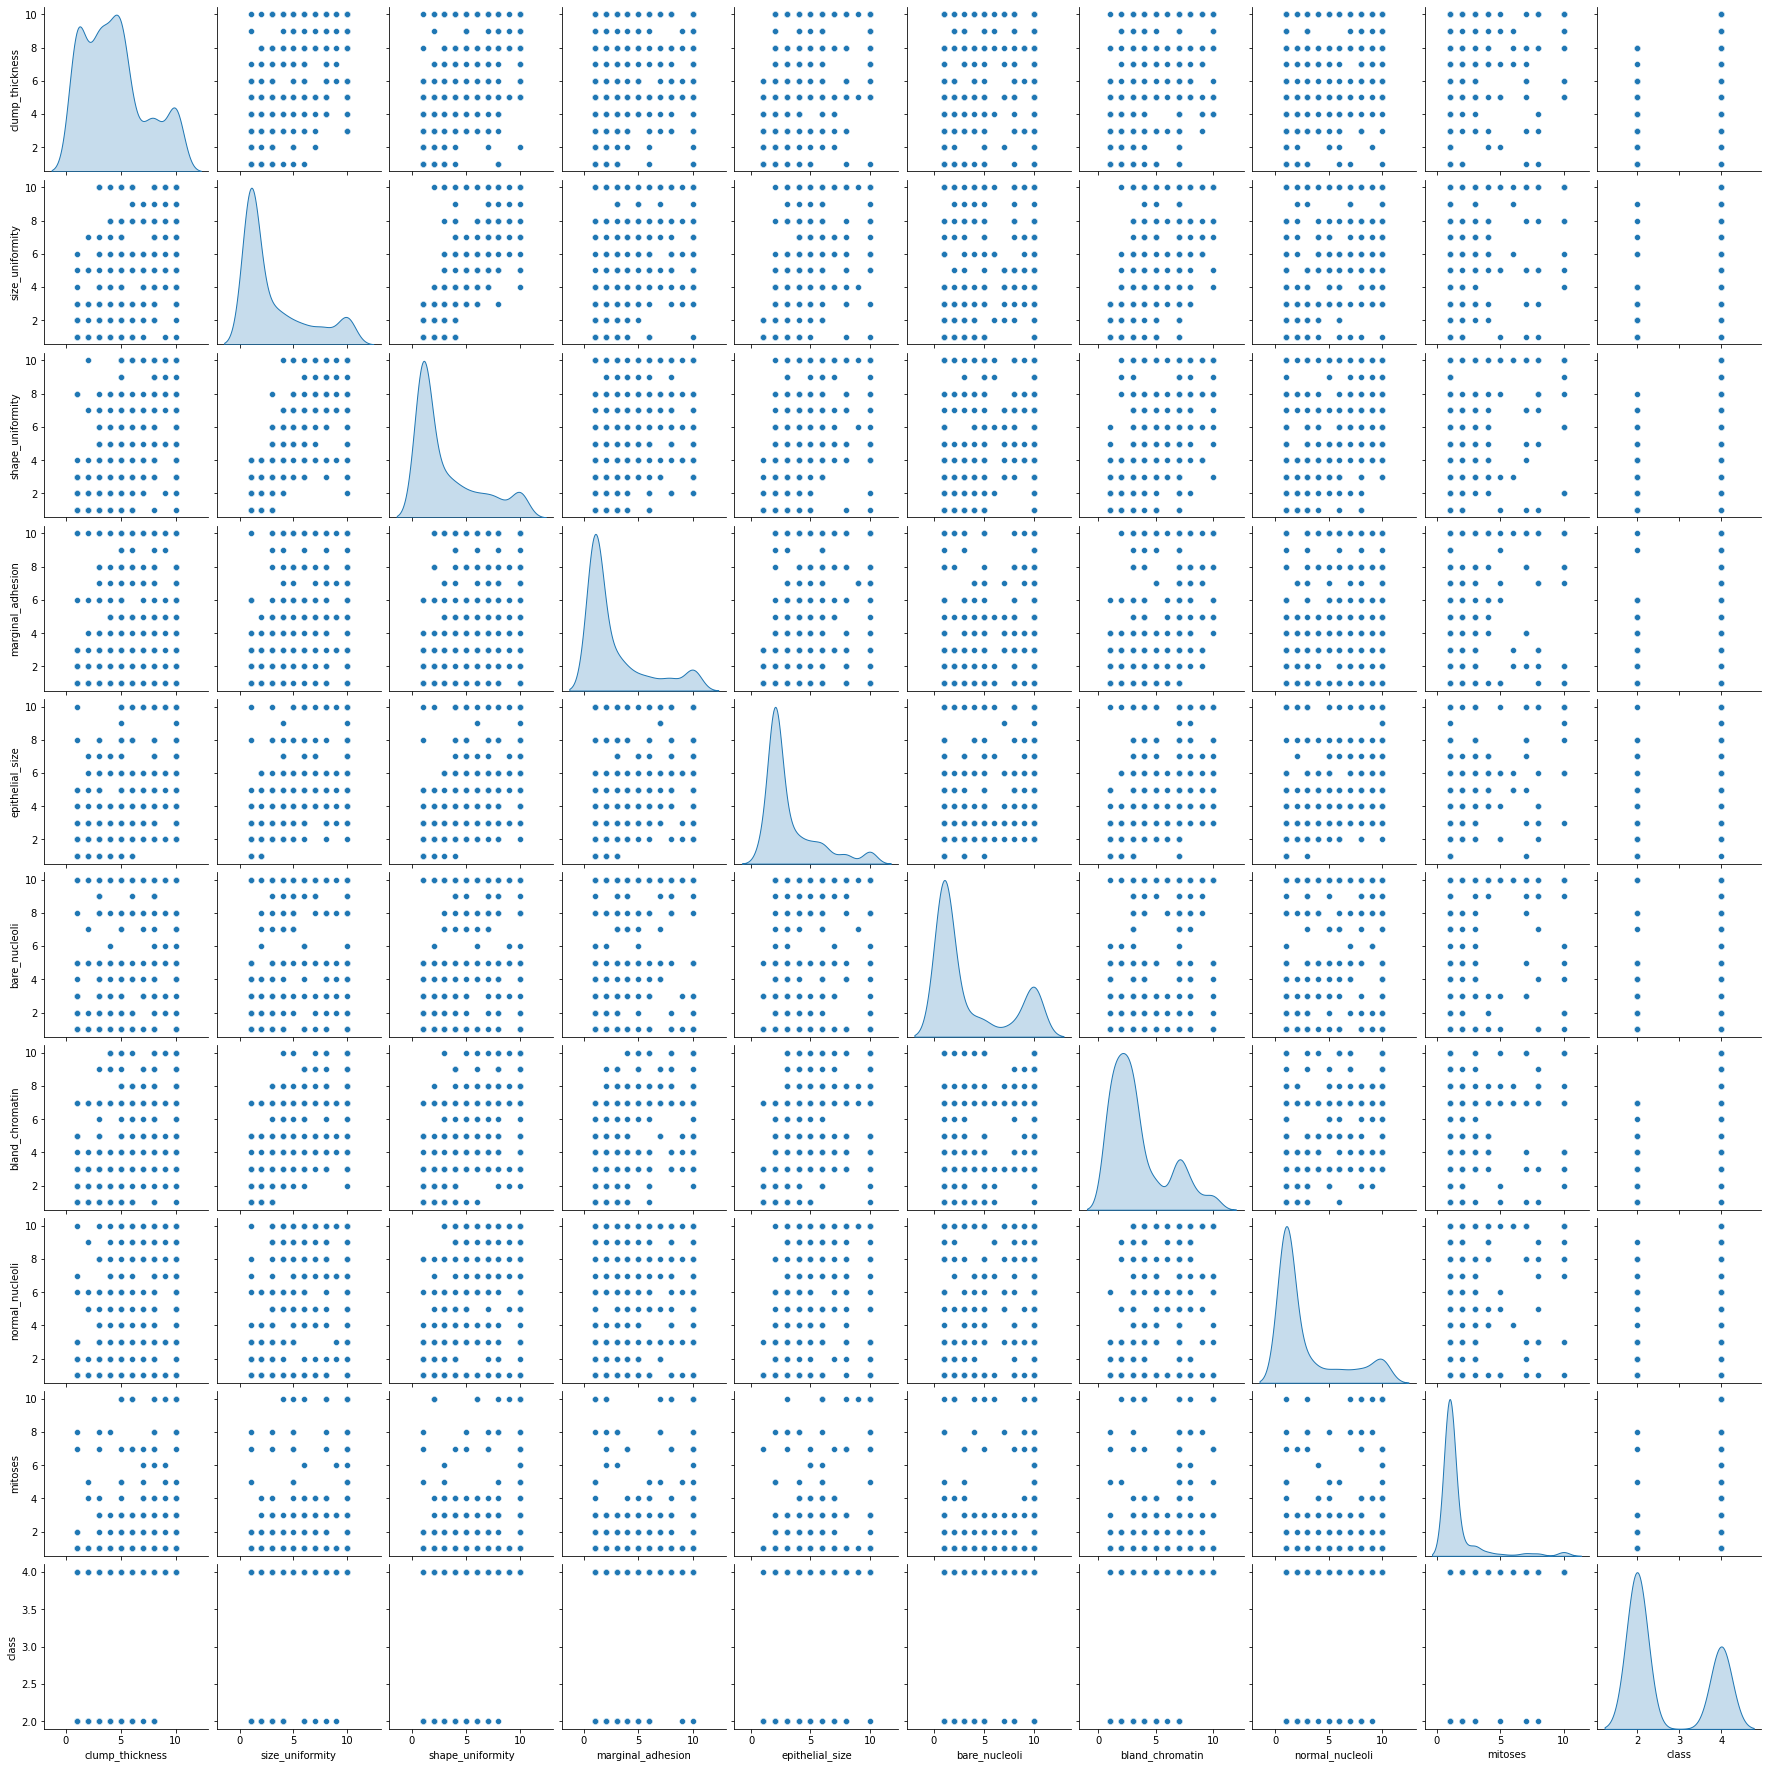

In [23]:
#### pairplot 
sns.pairplot(df_eda,diag_kind = 'kde')

### Model Creation

In [24]:
from sklearn.model_selection import train_test_split

train_test = df_eda.copy()
Y = train_test['class']
X = train_test.drop('class',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state = 1)
print(X_train.shape)
print(X_test.shape)

(489, 9)
(210, 9)


In [25]:
#### models SVM KNN

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

model1 = svm.SVC(C = 2,kernel = 'rbf').fit(X_train,y_train)
model2 = KNeighborsClassifier(n_neighbors = 5,weights = 'distance').fit(X_train,y_train)

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
#### performance matrix from SVM

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
print("Training accuracy for SVM is : " , accuracy_score(y_train,model1.predict(X_train)))
print("Training accuracy for SVM is : " ,  confusion_matrix(y_train, model1.predict(X_train)))

# precision tp / (tp + fp)
precision_train = precision_score(y_train, model1.predict(X_train),average=None)
print('Precision train: ' , precision_train)

# recall: tp / (tp + fn)
recall_train = recall_score(y_train, model1.predict(X_train),average=None)
print('Recall train: ' , recall_train)

# f1: 2 tp / (2 tp + fp + fn)
f1_train = f1_score(y_train, model1.predict(X_train),average=None)
print('F1 score train: ' , f1_train)

# accuracy: (tp + tn) / (p + n)
print("Test accuracy for SVM is : " , accuracy_score(y_test, model1.predict(X_test)))
print("Test accuracy for SVM is : " ,  confusion_matrix(y_test, model1.predict(X_test)))

# precision tp / (tp + fp)
precision_test = precision_score(y_test, model1.predict(X_test),average=None)
print('Precision test: ', precision_test)

# recall: tp / (tp + fn)
recall_test = recall_score(y_test, model1.predict(X_test),average=None)
print('Recall test: ' , recall_test)

# f1: 2 tp / (2 tp + fp + fn)
f1_test = f1_score(y_test, model1.predict(X_test),average=None)
print('F1 score test: ' , f1_test)

Training accuracy for SVM is :  1.0
Training accuracy for SVM is :  [[321   0]
 [  0 168]]
Precision train:  [1. 1.]
Recall train:  [1. 1.]
F1 score train:  [1. 1.]
Test accuracy for SVM is :  0.9809523809523809
Test accuracy for SVM is :  [[133   4]
 [  0  73]]
Precision test:  [1.         0.94805195]
Recall test:  [0.97080292 1.        ]
F1 score test:  [0.98518519 0.97333333]


In [27]:
#### performance matrix from KNN

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
print("Training accuracy for KNN is : " , accuracy_score(y_train,model2.predict(X_train)))
print("Training accuracy for KNN is : " ,  confusion_matrix(y_train, model2.predict(X_train)))

# precision tp / (tp + fp)
precision_train = precision_score(y_train, model2.predict(X_train),average=None)
print('Precision train: ' , precision_train)

# recall: tp / (tp + fn)
recall_train = recall_score(y_train, model2.predict(X_train),average=None)
print('Recall train: ' , recall_train)

# f1: 2 tp / (2 tp + fp + fn)
f1_train = f1_score(y_train, model2.predict(X_train),average=None)
print('F1 score train: ' , f1_train)

# accuracy: (tp + tn) / (p + n)
print("Test accuracy for KNN is : " , accuracy_score(y_test, model2.predict(X_test)))
print("Test accuracy for KNN is : " ,  confusion_matrix(y_test, model2.predict(X_test)))

# precision tp / (tp + fp)
precision_test = precision_score(y_test, model2.predict(X_test),average=None)
print('Precision test: ', precision_test)

# recall: tp / (tp + fn)
recall_test = recall_score(y_test, model2.predict(X_test),average=None)
print('Recall test: ' , recall_test)

# f1: 2 tp / (2 tp + fp + fn)
f1_test = f1_score(y_test, model2.predict(X_test),average=None)
print('F1 score test: ' , f1_test)

Training accuracy for KNN is :  1.0
Training accuracy for KNN is :  [[321   0]
 [  0 168]]
Precision train:  [1. 1.]
Recall train:  [1. 1.]
F1 score train:  [1. 1.]
Test accuracy for KNN is :  0.9714285714285714
Test accuracy for KNN is :  [[136   1]
 [  5  68]]
Precision test:  [0.96453901 0.98550725]
Recall test:  [0.99270073 0.93150685]
F1 score test:  [0.97841727 0.95774648]


In [28]:
#### one line classification report 
from sklearn.metrics import classification_report

print('SVM',classification_report(y_test,model1.predict(X_test)))
print('KNN',classification_report(y_test,model2.predict(X_test)))

SVM               precision    recall  f1-score   support

           2       1.00      0.97      0.99       137
           4       0.95      1.00      0.97        73

   micro avg       0.98      0.98      0.98       210
   macro avg       0.97      0.99      0.98       210
weighted avg       0.98      0.98      0.98       210

KNN               precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

   micro avg       0.97      0.97      0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



### Test Cases

In [31]:
#### creating test dataframe 
Data = [[5,1,1,1,2,1,3,1,1],[8,3,6,9,7,8,5,4,4]]

columns = ['clump_thickness','size_uniformity','shape_uniformity','marginal_adhesion','epithelial','bare_nucleoli',
           'bland_chromatin','normal_nucleoli','mitoses']

df_test = pd.DataFrame(data = Data,columns = columns)
df_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,8,3,6,9,7,8,5,4,4


In [32]:
#### prediction
print(model1.predict(df_test))

[2 4]


### dumping the model for future use

In [34]:
import joblib

joblib.dump(model1,'models/SVM.pkl')
joblib.dump(model2,'models/KNN.pkl')

['models/KNN.pkl']